In [ ]:
!pip install opencv-python mediapipe numpy pandas matplotlib seaborn tensorflow

In [ ]:
import cv2
import mediapipe as mp

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [ ]:
def mediapipe(frame, hands):
    frame = cv2.resize(cv2.flip(frame, 1), (640, 480))
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image.flags.writeable = False
    results = hands.process(image)
    image.flags.writeable = True

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    return image, results

In [ ]:
capture = cv2.VideoCapture(0)

In [ ]:
with mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:
    while capture.isOpened():
        ret, frame = capture.read()

        image, results = mediapipe(frame, hands)

        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    image, 
                    hand_landmarks, 
                    mp_hands.HAND_CONNECTIONS,
                )

        cv2.imshow("Hand Tracking", image)

        if cv2.waitKey(5) & 0xFF == 27:
            break

    capture.release()
    cv2.destroyAllWindows()

In [ ]:
results.multi_hand_landmarks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Dataset/train_data.csv')
test = pd.read_csv('Dataset/test_data.csv')

In [3]:
train.head()

,label,ver.x0,ver.y0,ver.z0,ver.x1,ver.y1,ver.z1,ver.x2,ver.y2,ver.z2,...,ver.z17,ver.x18,ver.y18,ver.z18,ver.x19,ver.y19,ver.z19,ver.x20,ver.y20,ver.z20
0,A,0.278411,0.695334,-6.762847e-07,0.200128,0.620533,-0.022475,0.142370,0.516582,-0.040151,...,-0.049513,0.365731,0.458294,-0.073240,0.357022,0.511900,-0.059459,0.346693,0.564412,-0.040863
1,A,0.579226,0.760085,-1.479179e-06,0.411217,0.680030,-0.040085,0.265983,0.565985,-0.118771,...,-0.242286,0.591494,0.576435,-0.280686,0.557463,0.594451,-0.267542,0.534894,0.644566,-0.263740
2,A,0.479878,0.789794,-1.101431e-06,0.379517,0.716278,-0.031272,0.307061,0.580528,-0.051447,...,-0.067705,0.580279,0.515611,-0.106108,0.559661,0.600459,-0.090427,0.554961,0.667288,-0.067013
3,A,0.475106,0.804069,-1.105380e-06,0.369806,0.720176,-0.034797,0.296779,0.589539,-0.059023,...,-0.075889,0.574916,0.524177,-0.114318,0.557065,0.611504,-0.097624,0.546631,0.681055,-0.074528
4,A,0.466990,0.802180,-1.071714e-06,0.365610,0.740132,-0.033263,0.292247,0.604434,-0.052462,...,-0.070841,0.566635,0.533698,-0.108298,0.545575,0.618803,-0.092145,0.540315,0.682023,-0.069202


In [4]:
test.head()

,label,ver.x0,ver.y0,ver.z0,ver.x1,ver.y1,ver.z1,ver.x2,ver.y2,ver.z2,...,ver.z17,ver.x18,ver.y18,ver.z18,ver.x19,ver.y19,ver.z19,ver.x20,ver.y20,ver.z20
0,B,0.468974,0.957347,8.264763e-07,0.334997,0.871521,-0.059660,0.252024,0.746197,-0.078749,...,0.001565,0.557779,0.479014,-0.010508,0.554430,0.399632,-0.020901,0.554333,0.327857,-0.031532
1,F,0.389900,0.802690,-4.815158e-07,0.295742,0.703891,-0.037011,0.234400,0.600398,-0.058510,...,-0.015473,0.690986,0.515100,-0.041385,0.719852,0.438441,-0.056521,0.723234,0.364735,-0.064935
2,G,0.396125,0.764175,-3.180436e-07,0.390238,0.598494,-0.018371,0.436514,0.499410,-0.020791,...,-0.028913,0.669916,0.721085,-0.064301,0.587629,0.739817,-0.035708,0.537452,0.751202,-0.001966
3,I,0.698550,0.819186,-8.286916e-07,0.549498,0.726644,-0.036801,0.465512,0.568181,-0.065155,...,-0.060483,0.758317,0.243623,-0.097302,0.748477,0.144045,-0.098005,0.737958,0.050565,-0.085202
4,J,0.302200,0.717258,-8.534749e-07,0.258111,0.584270,-0.047144,0.309129,0.440646,-0.065515,...,-0.004593,0.632797,0.460989,-0.035958,0.689990,0.406403,-0.043470,0.744364,0.348788,-0.039284


In [5]:
labels = train['label'].values
unique_val = np.array(labels)
np.unique(unique_val)

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

<Axes: ylabel='count'>

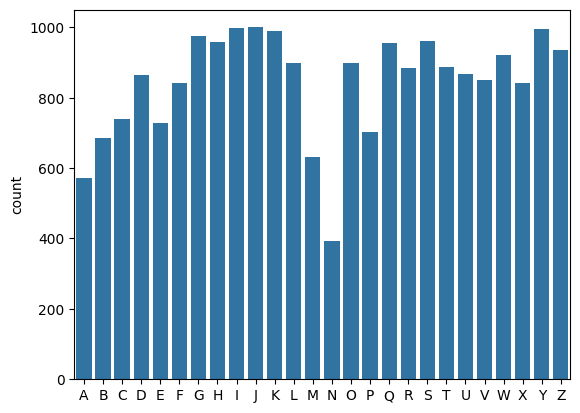

In [6]:
plt.figure()
sns.countplot(x = labels)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [8]:
num_classes = len(np.unique(unique_val))
num_epochs = 200
batch_size = 128

In [9]:
l = train['label'].tolist()
y_train = [ord(label) - ord('A') for label in l]
x_train = []
for i, row in train.iterrows():
    features = row.drop('label').values
    x_train.append(features)

In [10]:
l = test['label'].tolist()
y_test = [ord(label) - ord('A') for label in l]
x_test = []
for i, row in test.iterrows():
    features = row.drop('label').values
    x_test.append(features)

In [11]:
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [12]:
x_train = np.array(x_train, dtype='float32')
x_test = np.array(x_test, dtype='float32')

In [13]:
y_train.shape

(21975, 26)

In [14]:
y_test.shape

(15, 26)

In [15]:
x_test.shape

(15, 63)

In [16]:
model = Sequential()

model.add(Dense(units=256, activation='relu', input_shape=(63,)))
model.add(Dropout(0.5))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=num_classes, activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               16384     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 26)                1

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_data=(x_test, y_test))

Epoch 1/200


172/172 [==============================] - 2s 4ms/step - loss: 3.0995 - accuracy: 0.0922 - val_loss: 2.0176 - val_accuracy: 0.5333
Epoch 2/200
172/172 [==============================] - 0s 2ms/step - loss: 1.8736 - accuracy: 0.3735 - val_loss: 0.6260 - val_accuracy: 0.9333
Epoch 3/200
172/172 [==============================] - 0s 2ms/step - loss: 1.1519 - accuracy: 0.5895 - val_loss: 0.3633 - val_accuracy: 0.9333
Epoch 4/200
172/172 [==============================] - 0s 2ms/step - loss: 0.8601 - accuracy: 0.6955 - val_loss: 0.2602 - val_accuracy: 0.9333
Epoch 5/200
172/172 [==============================] - 0s 2ms/step - loss: 0.7142 - accuracy: 0.7456 - val_loss: 0.1771 - val_accuracy: 0.9333
Epoch 6/200
172/172 [==============================] - 0s 3ms/step - loss: 0.6047 - accuracy: 0.7910 - val_loss: 0.1333 - val_accuracy: 0.9333
Epoch 7/200
172/172 [==============================] - 0s 2ms/step - loss: 0.5375 - accuracy: 0.8156 - val_loss: 0.1086 - val_accuracy: 1.00

<function matplotlib.pyplot.show(close=None, block=None)>

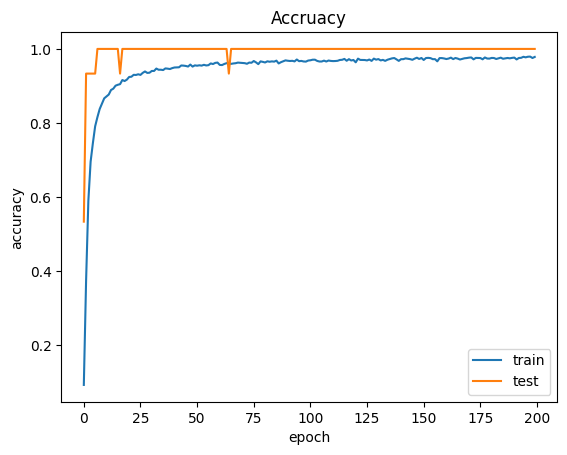

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Accruacy")
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['train', 'test'])

plt.show

In [21]:
model.save("ASL-detection-model.keras")